In [170]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader 
import matplotlib.pyplot as plt
import requests

from dstapi import DstApi 
from IPython.display import display
from io import StringIO

from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd



This dataproject will decriptively review the circumstances around the invasion of Ukraine and how out trading patterns have differed since. We want to research, 

1.   How was the Danish trade volume affected?
2.   How was the Danish trade with countries close by the action affected?
3.   Has any other country seen substantial growth ever since the "special operation" began? 

We'll start just plotting the general trade volume. 



In [171]:
UHV = DstApi("UHV3") #Collecting data. Loading it directly from DST. 
BIL55 = DstApi("BIL55") 
tabUHV = UHV.tablesummary(language='en')
tabBIL = BIL55.tablesummary(language='en')
#display(tabUHV)
#display(tabBIL)

# convert the DstApi objects to pandas data frames
#UH = pd.DataFrame.from_dict(dict(UHV3))
#BIL = pd.DataFrame.from_dict(dict(BIL55))

# print the data frames
#print(UH.head())
#print(BIL.head())
for variable in tabUHV['variable name']:
    print(variable+':')
    display(UHV.variable_levels(variable, language='en'))

for variable in tabBIL['variable name']:
    print(variable+':')
    display(BIL55.variable_levels(variable, language='en'))



Table UHV3: Total external trade by imports and exports, kind, country and time
Last update: 2023-05-09T08:00:00
Table BIL55: New registrated passenger cars by type of registration and time
Last update: 2023-05-10T08:00:00
INDUD:


,id,text
0,1,Imports
1,2,Exports


ART:


,id,text
0,TOT,TOTAL
1,TOTXSOFX3,"TOTAL (excl. vessels, aircraft, fuels etc.)"
2,0-4X2-3,"Live animals, Food, Beverages And Tobacco"
3,2,"Crude Materials, Inedible, Except Fuels"
4,5,Chemicals And Related Products
5,6,Manufactured Goods Classified Chiefly By Material
6,7X78-79,Machinery (excl. Transport Equipment)
7,78-79,Transport Equipment
8,8-9,Miscellaneous Manufactured Articles
9,3,"Mineral Fuels, Lubricants And Related Materials"


LAND:


,id,text
0,TOT,COUNTRIES TOTAL
1,G01,EU-27 (without the United Kingdom)
2,DE,Germany
3,SE,Sweden
4,NL,Netherlands
5,FR,France
6,G02,World outside EU
7,NO,Norway
8,GB,United Kingdom
9,US,USA


Tid:


,id,text
0,1997M01,1997M01
1,1997M02,1997M02
2,1997M03,1997M03
3,1997M04,1997M04
4,1997M05,1997M05
...,...,...
310,2022M11,2022M11
311,2022M12,2022M12
312,2023M01,2023M01
313,2023M02,2023M02


REGBIL:


,id,text
0,4000101002,"Passenger cars, total"
1,4000101107,"Total supply of passenger cars, seasonally adj..."
2,4000101003,Total supply of passenger cars to households
3,4000101104,"Total supply of passenger cars to households, ..."
4,4000101004,Passenger cars in households
5,40001050002,Leasing of passenger vars in households
6,40001050004,Total supply of passenger cars to industries
7,4000101105,"Total supply of passenger cars to industries, ..."
8,40001050006,Purchase of passenger cars in industries
9,40001050008,Leasing of passenger cars ind industries


Tid:


,id,text
0,2007M01,2007M01
1,2007M02,2007M02
2,2007M03,2007M03
3,2007M04,2007M04
4,2007M05,2007M05
...,...,...
191,2022M12,2022M12
192,2023M01,2023M01
193,2023M02,2023M02
194,2023M03,2023M03


In [207]:
paramUH = UHV._define_base_params(language='en')
paramUH



{'table': 'uhv3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'INDUD', 'values': ['*']},
  {'code': 'ART', 'values': ['*']},
  {'code': 'LAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
paramBIL = BIL55._define_base_params(language='en')
paramBIL

#BIL55 = pd.read_csv('BIL55.csv')
#UHV3 = pd.read_csv('UHV3.csv')
#data.set_index('Year', inplace=True)


In [206]:
variables = paramUH['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['*']
variables[2]['values'] =['TOT']
variables[3]['values'] = ['TOT']
paramUH

{'table': 'uhv3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'INDUD', 'values': ['1']},
  {'code': 'ART', 'values': ['*']},
  {'code': 'LAND', 'values': ['TOT']},
  {'code': 'Tid', 'values': ['TOT']}]}

In [193]:
variables = paramBIL['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['0']
paramBIL

{'table': 'bil55',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'REGBIL', 'values': ['4000101002']},
  {'code': 'Tid', 'values': ['0']}]}

In [208]:
paramUH = {'table': 'uhv3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'INDUD', 'values': ['1']},
  {'code': 'ART', 'values': ['TOT']},
  {'code': 'LAND', 'values': ['TOT']},
  {'code': 'Tid', 'values': ['>2018M01<=2023M03']}]}

paramBIL =  {'table': 'bil55',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'REGBIL', 'values': ['4000101002']},
  {'code': 'Tid', 'values': ['>2018M01<=2023M03']}]}

UH = UHV.get_data(params=paramUH)
BIL = BIL55.get_data(params=paramBIL)

print(BIL.head())
print(UH.head())





                  REGBIL      TID  INDHOLD
0  Passenger cars, total  2019M08    18711
1  Passenger cars, total  2019M12    15471
2  Passenger cars, total  2022M03    14746
3  Passenger cars, total  2021M10    12720
4  Passenger cars, total  2019M11    18088
     INDUD    ART             LAND      TID  INDHOLD
0  Imports  TOTAL  COUNTRIES TOTAL  2018M02  49037.5
1  Imports  TOTAL  COUNTRIES TOTAL  2018M03  53470.2
2  Imports  TOTAL  COUNTRIES TOTAL  2018M04  60695.8
3  Imports  TOTAL  COUNTRIES TOTAL  2018M05  54372.6
4  Imports  TOTAL  COUNTRIES TOTAL  2018M06  53690.5


     INDUD    ART             LAND   Months INDHOLD_x                 REGBIL  \
0  Imports  TOTAL  COUNTRIES TOTAL  2018M02   49037.5  Passenger cars, total   
1  Imports  TOTAL  COUNTRIES TOTAL  2018M03   53470.2  Passenger cars, total   
2  Imports  TOTAL  COUNTRIES TOTAL  2018M04   60695.8  Passenger cars, total   
3  Imports  TOTAL  COUNTRIES TOTAL  2018M05   54372.6  Passenger cars, total   
4  Imports  TOTAL  COUNTRIES TOTAL  2018M06   53690.5  Passenger cars, total   

   INDHOLD_y  
0      17273  
1      19785  
2      18766  
3      22592  
4      22555  


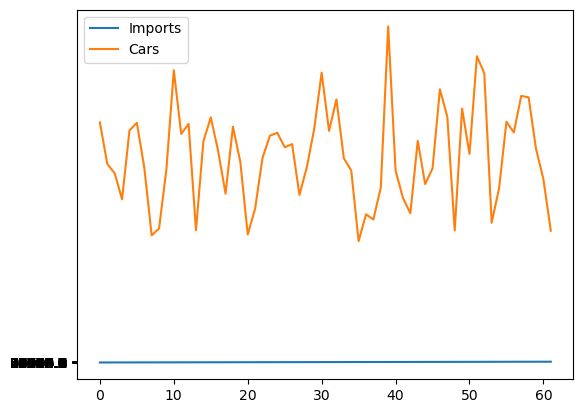

In [209]:
UH1=UH.rename(columns={ 'TID':'Months'})
BIL5=BIL.rename(columns={'TID':'Months'})

Figure = plt.figure()
ax = Figure.add_subplot(1,1,1)
ax.plot(UH1['INDHOLD'],label='Imports')
ax.plot(BIL5['INDHOLD'],label='Cars')
ax.legend(frameon=True)


Merged = pd.merge(UH1,BIL5,how='inner',on=['Months'])

print(Merged.head())

In [132]:
Figure = plt.figure()
ax = Figure.add_subplot(1,1,1)
ax.plot(Merged['INDHOLD_x'],label='Imports')
ax.plot(Merged['INDHOLD_y'],label='Cars')
ax.set_xticks(Merged['Months'].dt.year)
ax.set_xticklabels(Merged['Months'].dt.year)
ax.set_xlabel(Merged['Months'])
ax.legend(frameon=True)